/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


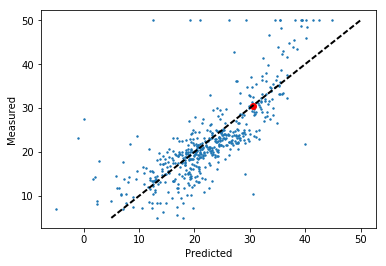

In [18]:
%matplotlib inline
import pandas as pd
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()

# pd.DataFrame(boston.feature_names)
# pd.DataFrame(boston.data)
# pd.DataFrame(boston.target)




y = boston.target
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, boston.data, y, cv=10)
from sklearn.externals import joblib

joblib.dump(lr,"./lr_machine.pkl")
lr=joblib.load("./lr_machine.pkl")
lr.fit(boston.data, y)
predict_y=lr.predict(boston.data[2])
plt.scatter(predicted,y,s=2)
plt.plot(predict_y, predict_y, 'ro')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')

/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

『交叉驗證R方值:』 [ 0.56627271  0.52827071  0.75296733  0.70277836  0.76764167]
『測試集R方值:』 0.785400139811


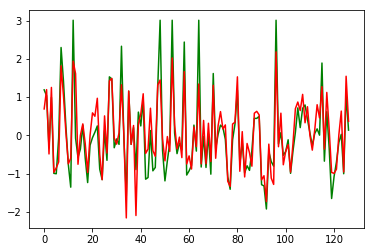

In [62]:
from __future__ import print_function
import numpy as np
np.random.seed(15555)
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
%matplotlib inline

data = datasets.load_boston()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)

X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

plt.plot(y_test,'g')
plt.plot(model.predict(X_test),'r')

regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)

print('『交叉驗證R方值:』', scores)
regressor.fit_transform(X_train, y_train)


print('『測試集R方值:』', regressor.score(X_test, y_test))
